This notebook shows an implementation of the epsilon "soft" support vector regression on a dataset of point that follows non linear function.

**Model:**

SVR with kernel and model with slack variables.

**Remarks:**
- We use the already existing implementation from `scikit-learn`.

In [1]:
%load_ext autoreload
%autoreload 2

# Third party libraries imports
import numpy as np

# Local imports
from sv_machines.datasets.function_a import get_function_a_dataset, get_function_a_plot
from sv_machines.datasets.utils import add_prediction_function_to_plot
from sklearn.svm import SVR

# Load a `function_a` dataset

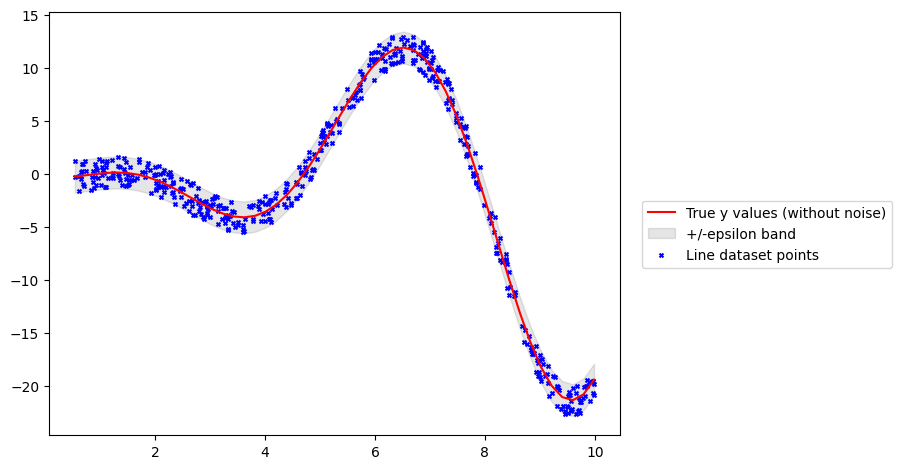

In [2]:
radius, epsilon = 5, 1.5

x_data, y_data = get_function_a_dataset(
    epsilon=epsilon, num_points=500, epsilon_strict=True
)
fig, ax = get_function_a_plot(x_data, y_data, epsilon, with_true_function=True)
fig.tight_layout()
fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Perfom $\varepsilon$ "soft" support vector regression on the dataset


-----------------------------
C=1, epsilon=1.6, kernel=poly
-----------------------------

SVR(epsilon=1.6, kernel='poly', max_iter=1000000)
-----------------------------
C=1, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=1000000)
-----------------------------
C=0.1, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=1000000)
-----------------------------
C=0.001, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=1000000)
-----------------------------
C=0.0001, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=1000000)
-----------------------------
C=1e-05, epsilon=2, kernel=poly
-----------------------------

SVR(epsilon=2, kernel='poly', max_iter=1000000)
-----------------------------
C=1, epsilon=1.6, kernel=rbf
-----------------------------

SVR(epsilon=1.6, max_iter=1000000)
-----------------------------
C=1,

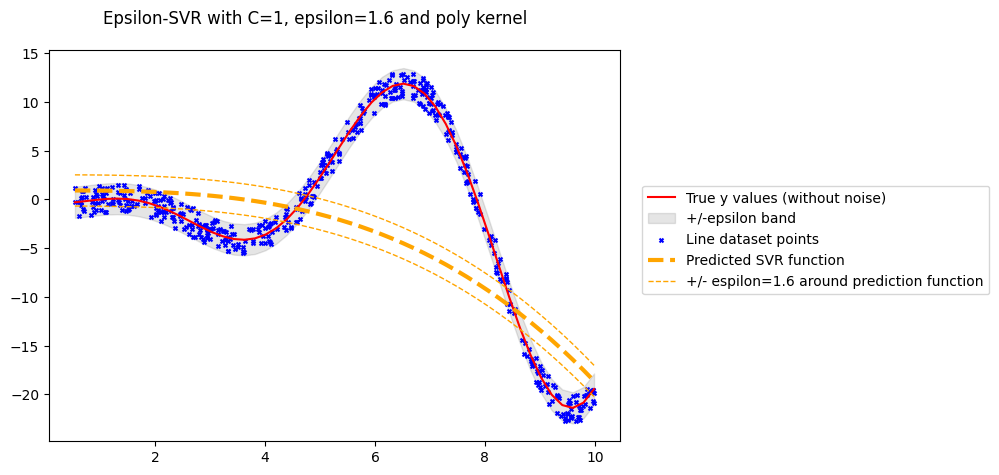

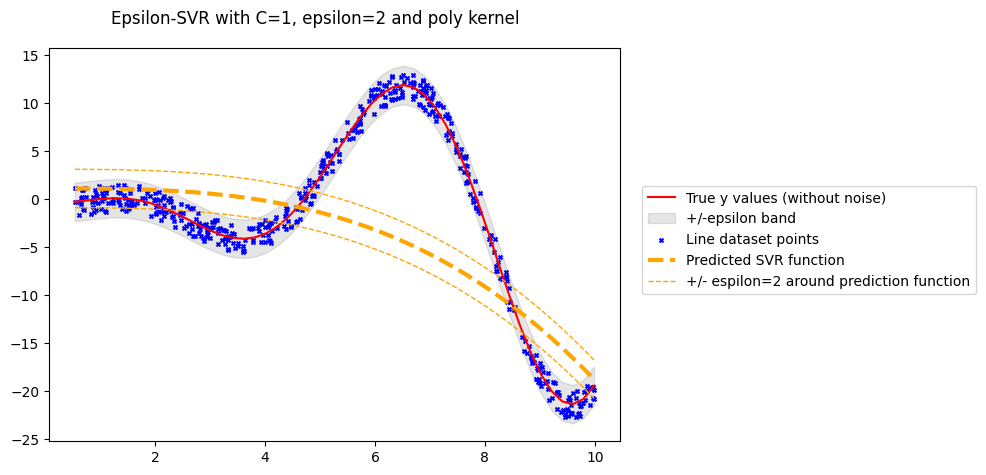

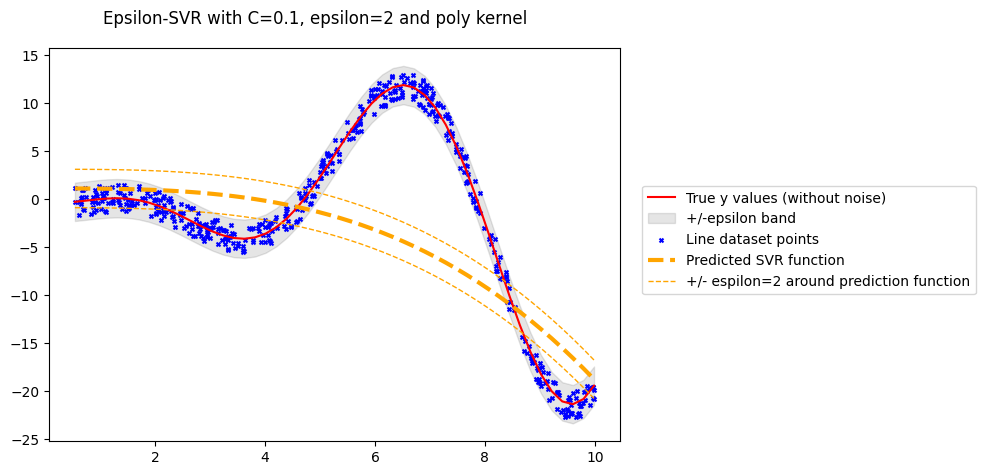

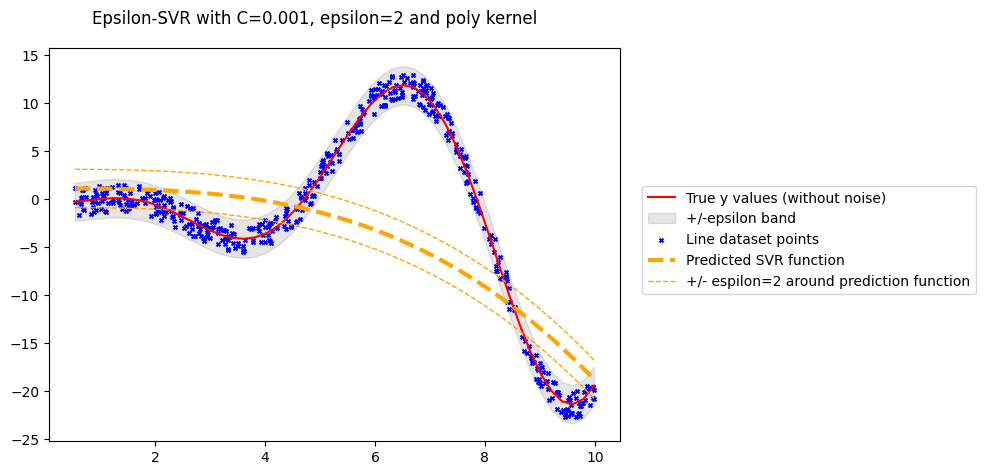

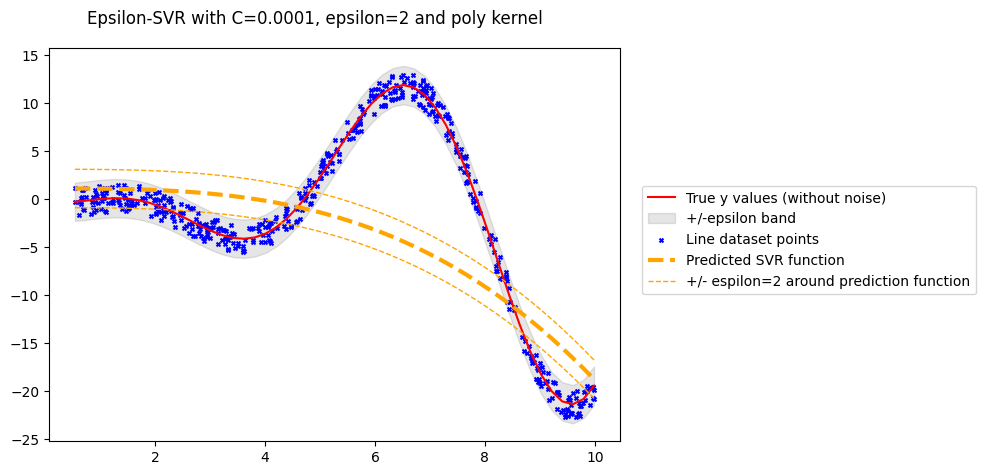

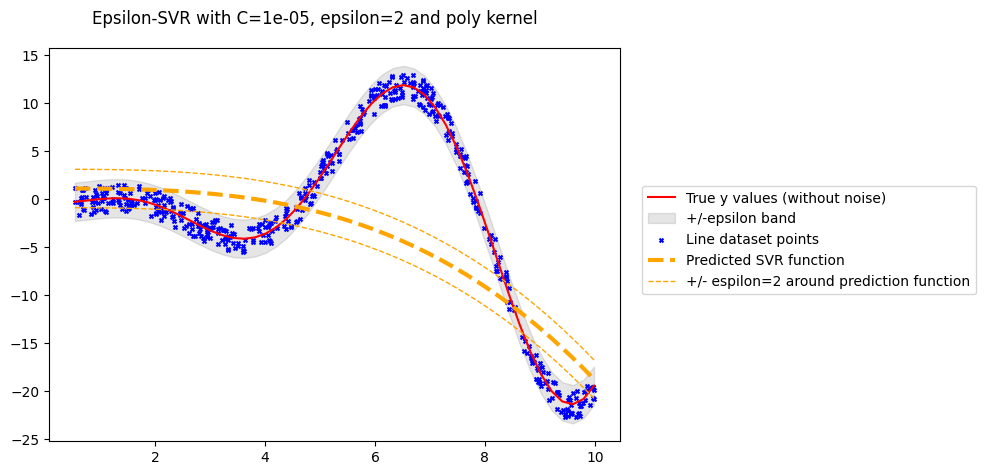

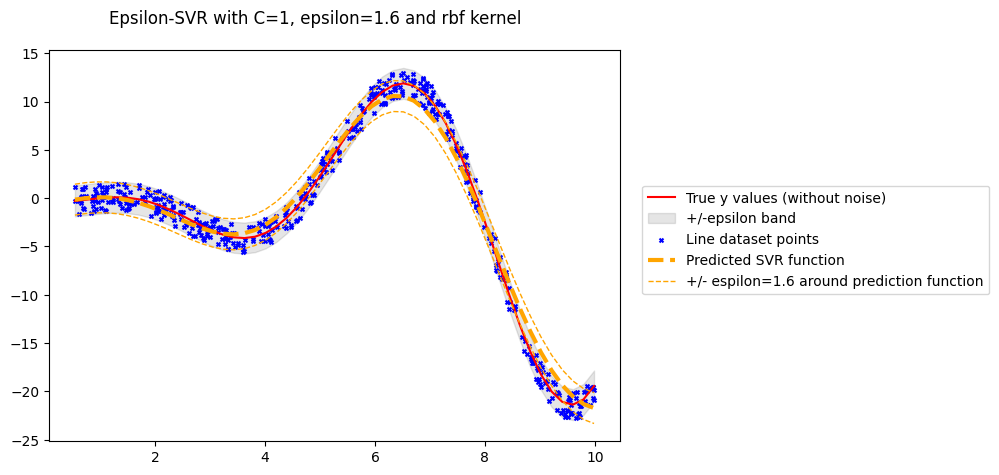

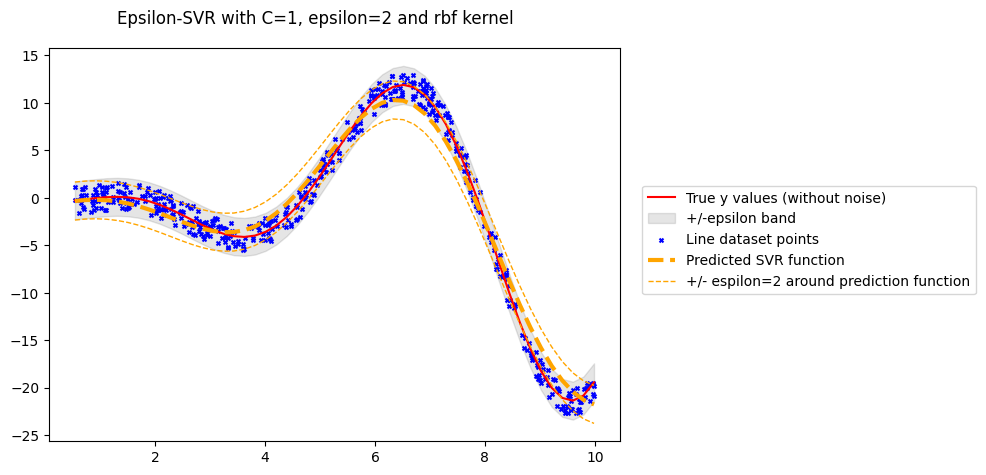

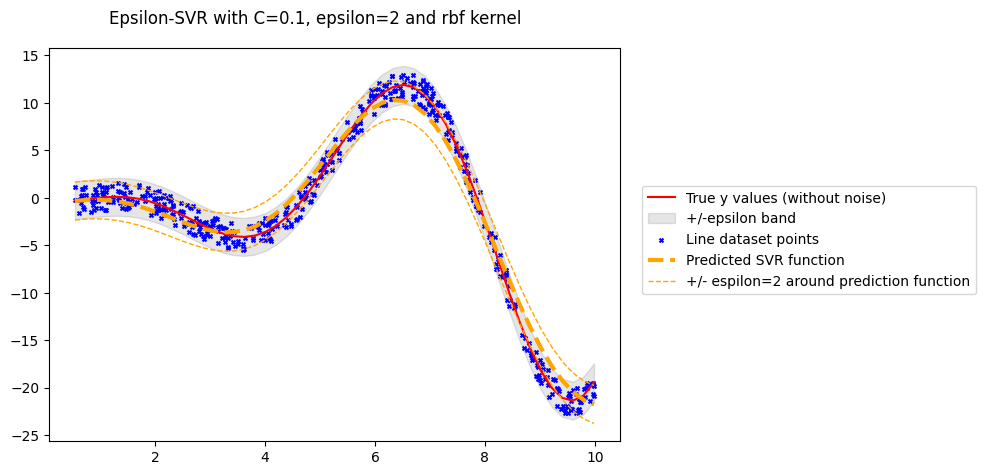

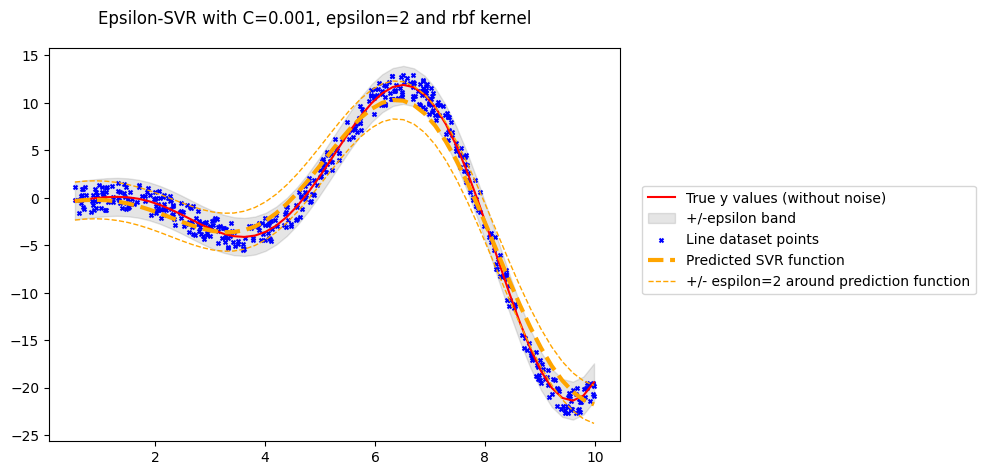

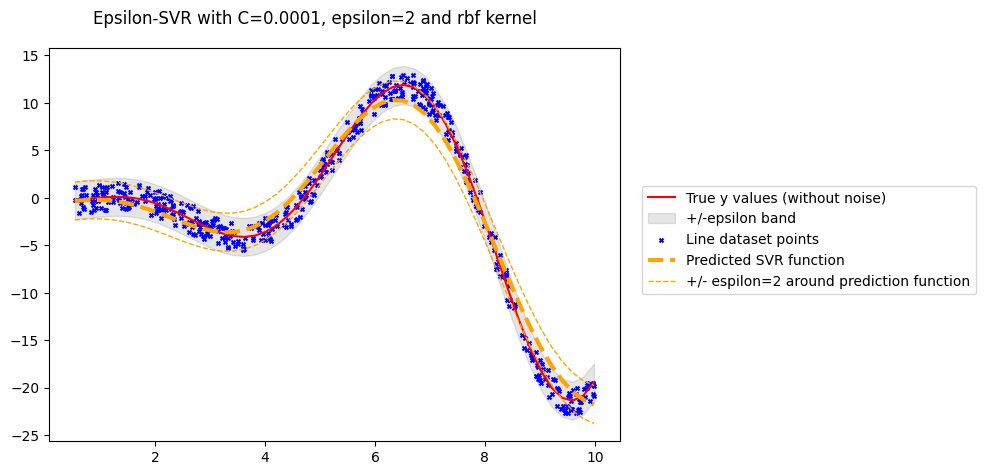

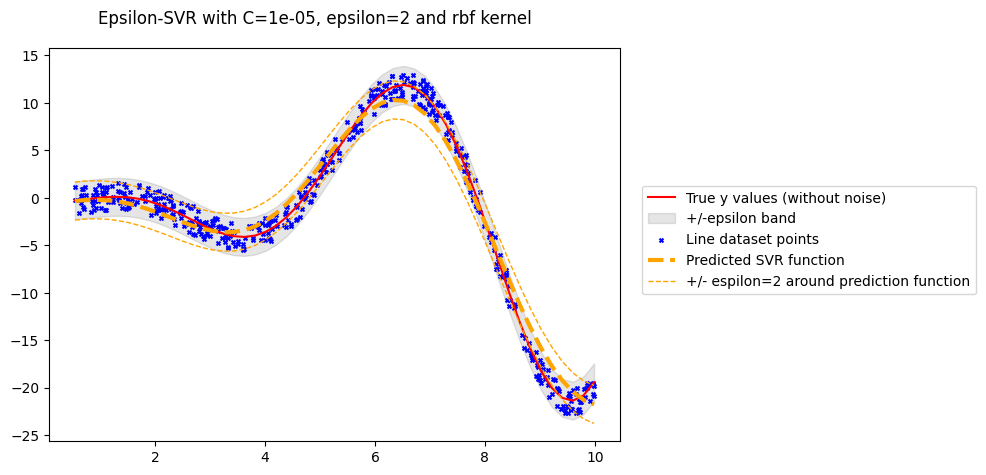

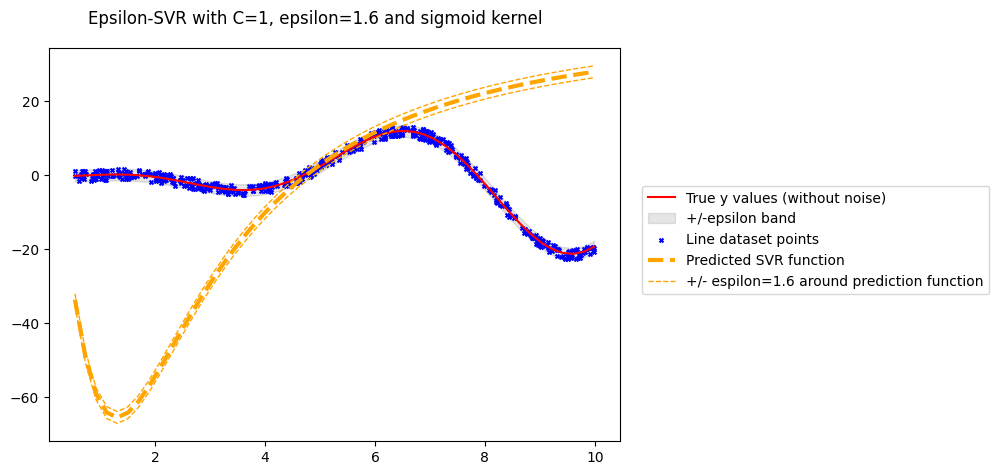

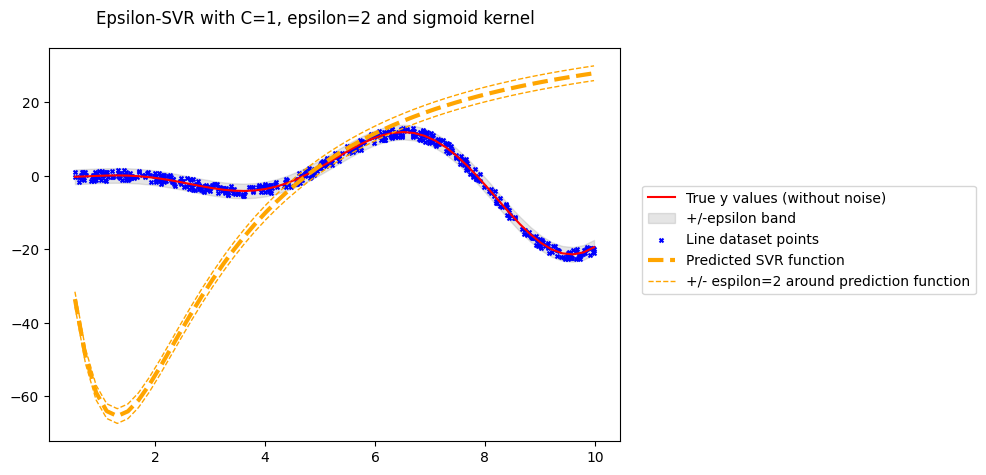

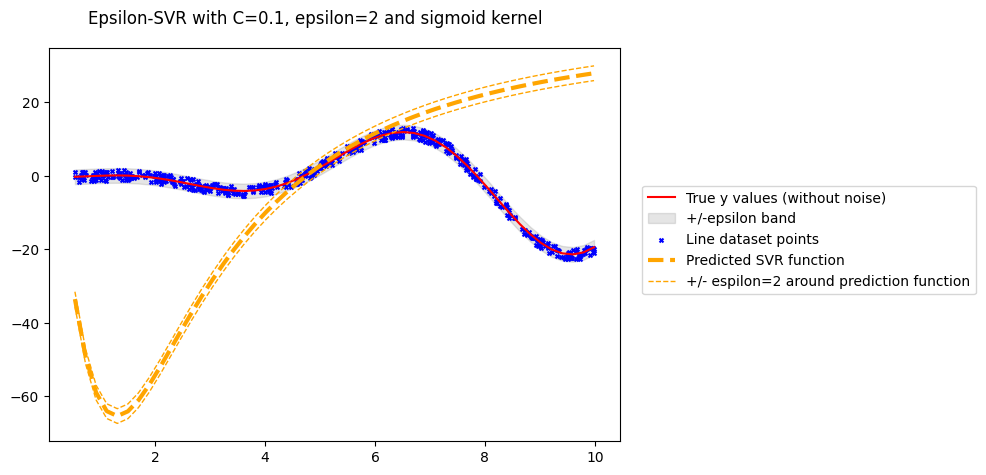

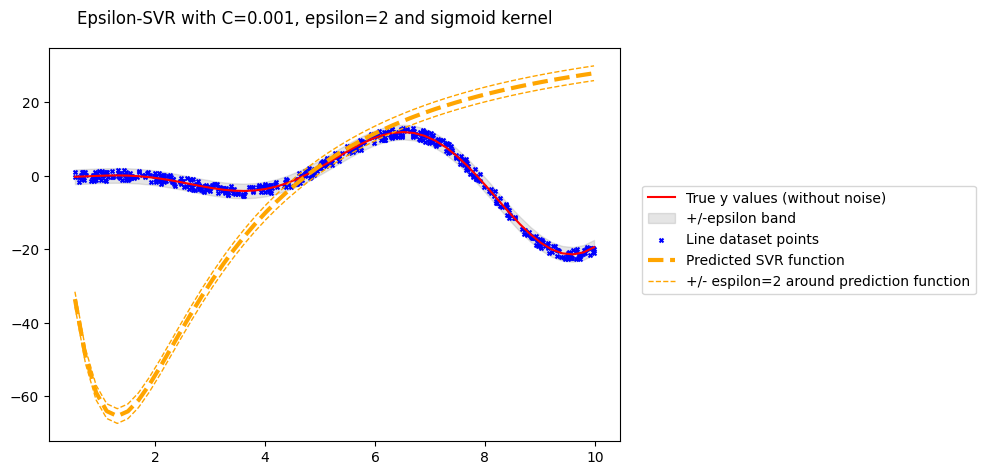

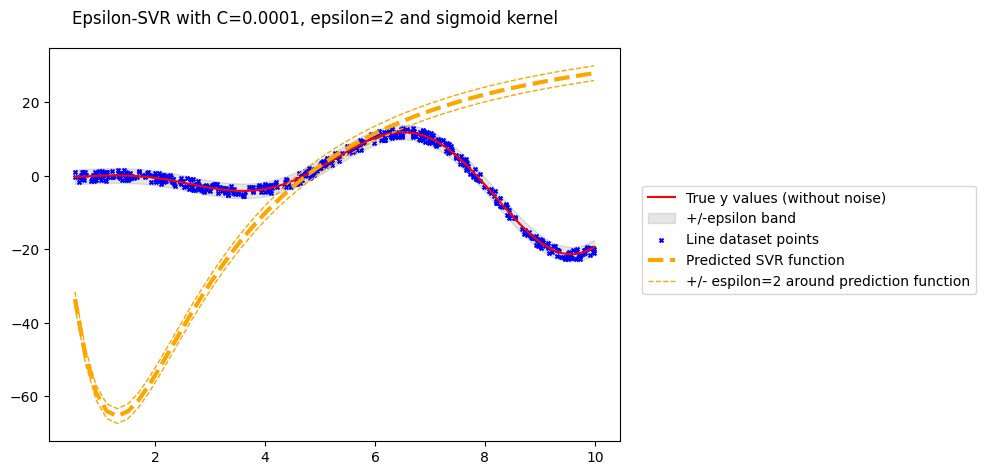

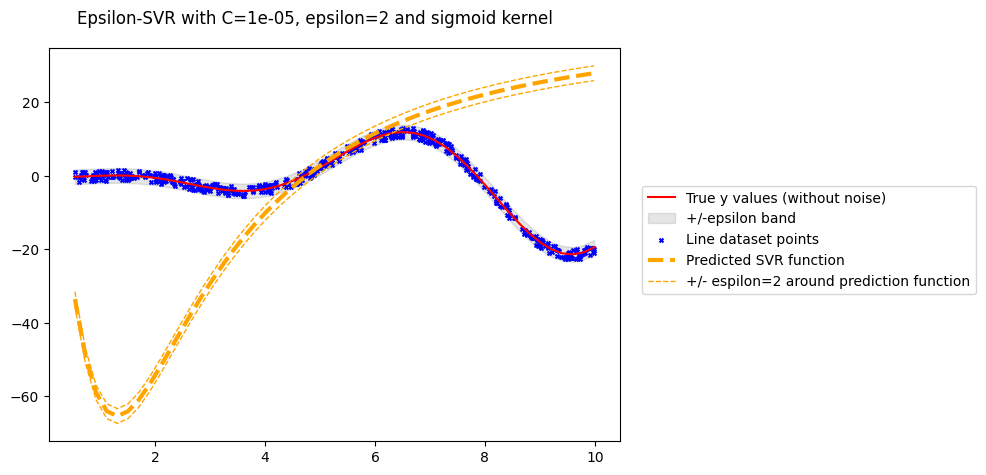

In [4]:
for kernel in ["poly", "rbf", "sigmoid"]:
    for C, epsilon in [
        (1, 1.6),
        (1, 2),
        (10**-1, 2),
        (10**-3, 2),
        (10**-4, 2),
        (10**-5, 2),
    ]:
        print(
            f"-----------------------------\nC={C}, epsilon={epsilon}, kernel={kernel}\n-----------------------------\n"
        )
        model = SVR(epsilon=epsilon, kernel=kernel, max_iter=1000000)
        model.fit(x_data.reshape(-1, 1), y_data)
        print(model)
        # print(f"Regression function : y={model.coef_}*x+{model.intercept_} \n")
        fig, ax = get_function_a_plot(x_data, y_data, epsilon, with_true_function=True)
        x_ordered = np.linspace(min(x_data), max(x_data), 100).reshape(-1, 1)
        # ax.plot(
        #     x_ordered,
        #     model.predict(x_ordered.reshape(-1, 1)),
        #     color="orange",
        #     linestyle="--",
        #     linewidth=3,
        #     label=f"Predicted SVR function",
        # )
        add_prediction_function_to_plot(
            ax=ax,
            x_dataset=x_ordered,
            prediction_function=model.predict,
            epsilon=epsilon,
            prediction_function_label="Predicted SVR function",
        )
        fig.suptitle(f"Epsilon-SVR with C={C}, epsilon={epsilon} and {kernel} kernel")
        fig.tight_layout()
        fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))